In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import text_recognizer
except ImportError:
    import sys
    sys.path.append('..')

from text_recognizer.datasets import IamDataset
from text_recognizer.datasets.iam_paragraphs_dataset import IAMParagraphsDataset
from text_recognizer.models.line_detector_model import LineDetectorModel
from text_recognizer import util

2025-03-09 20:57:38.806966: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-09 20:57:39.750387: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-09 20:57:39.750537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-09 20:57:39.949970: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 20:57:40.362142: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-09 20:57:40.367052: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
paragraphs_dataset = IAMParagraphsDataset()
paragraphs_dataset.load_or_generate_data()
print(paragraphs_dataset)

Loading IAM paragraph crops and ground truth from image files...
IAM Paragraphs Dataset
Num classes: 3
Train: (1229, 256, 256) (1229, 256, 256, 3)
Test: (308, 256, 256) (308, 256, 256, 3)



In [4]:
line_detector_model = LineDetectorModel()
line_detector_model.load_weights()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None)]         0         []                            
                                                                                                  
 lambda (Lambda)             (None, None, None, 1)        0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 16)       800       ['lambda[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, None, None, 16)       12560     ['conv2d[0][0]']              
                                                                                              

1/1 [==============================] - 0s 204ms/step


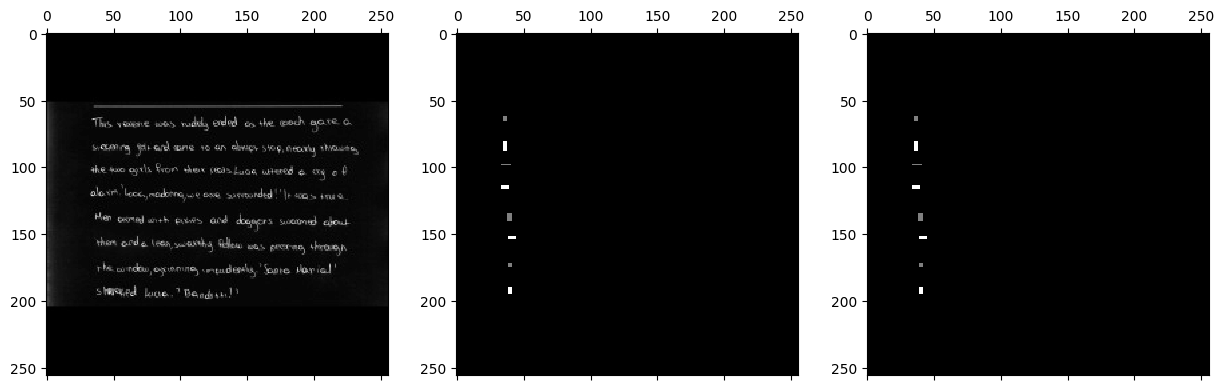

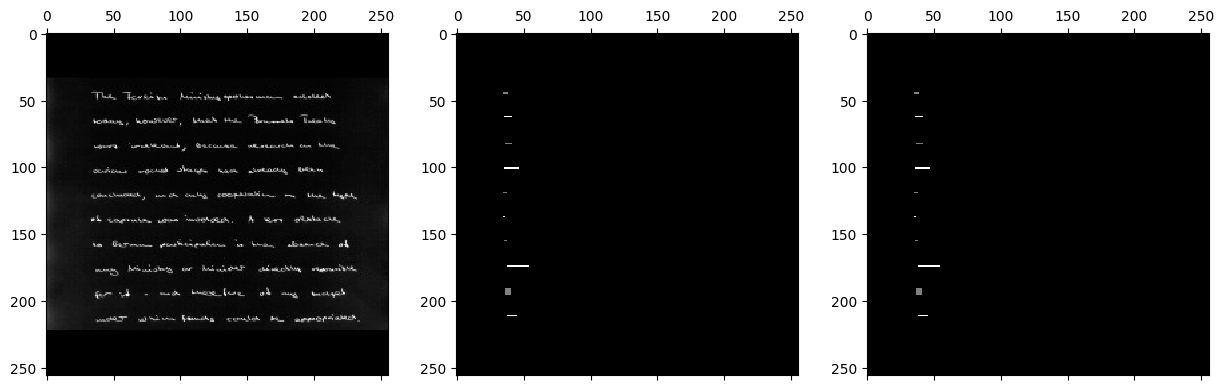

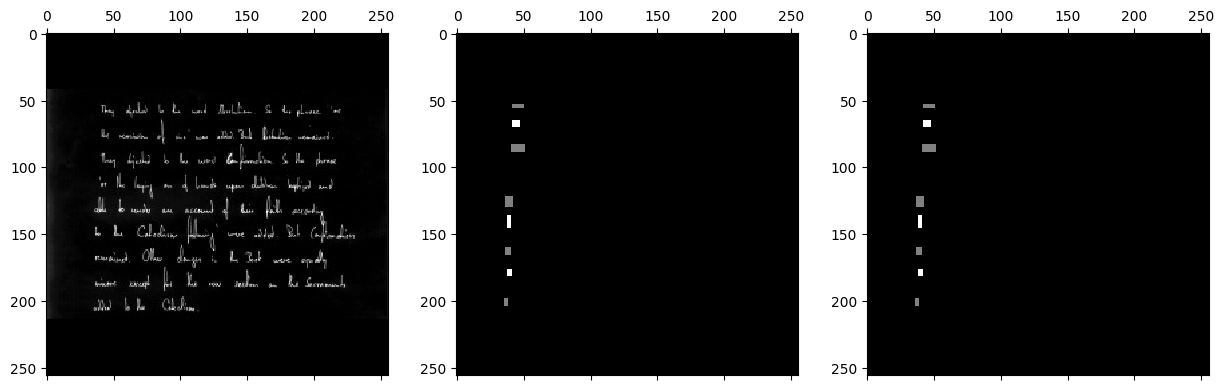

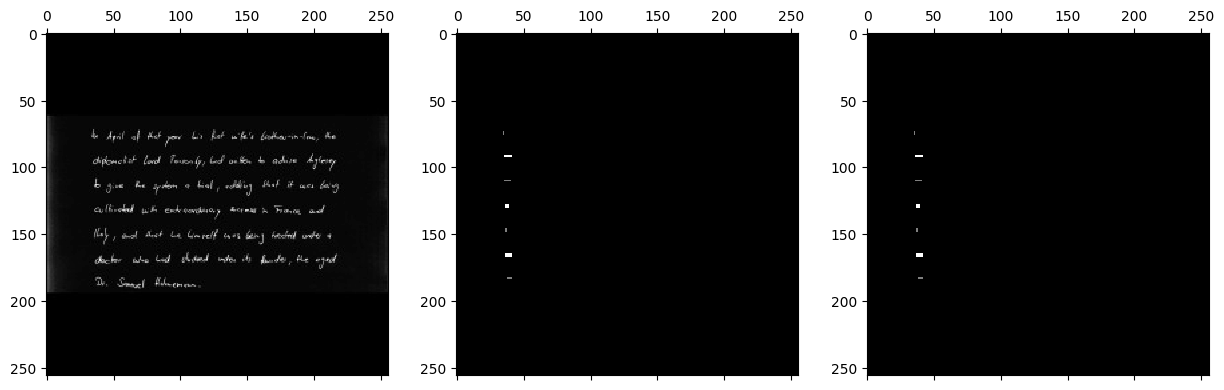

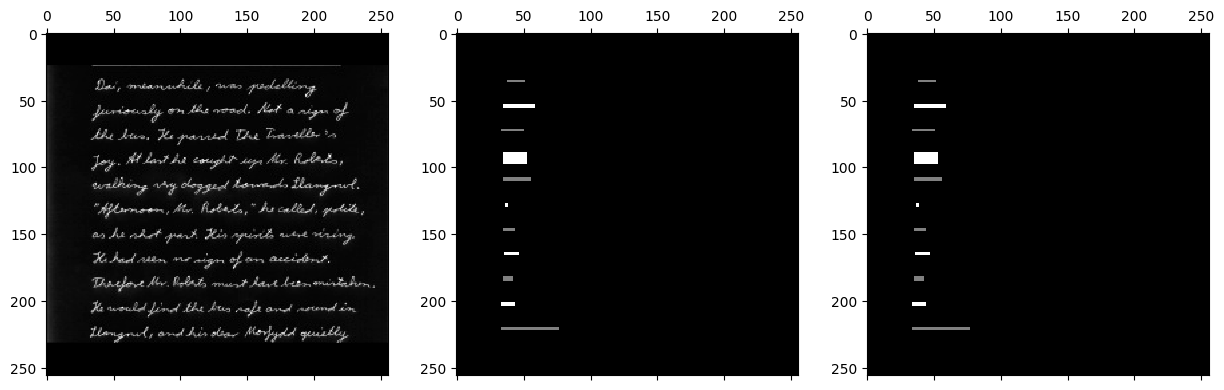

In [5]:
for ind in range(5):
    image = paragraphs_dataset.x_test[ind]
    gt = paragraphs_dataset.y_test[ind].argmax(-1)
    pred = line_detector_model.predict_on_image(image).argmax(-1)

    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(131)
    ax1.matshow(image, cmap='gray')
    ax2 = fig.add_subplot(132)
    ax2.matshow(gt, cmap='gray')
    ax3 = fig.add_subplot(133)
    ax3.matshow(gt, cmap = 'gray')

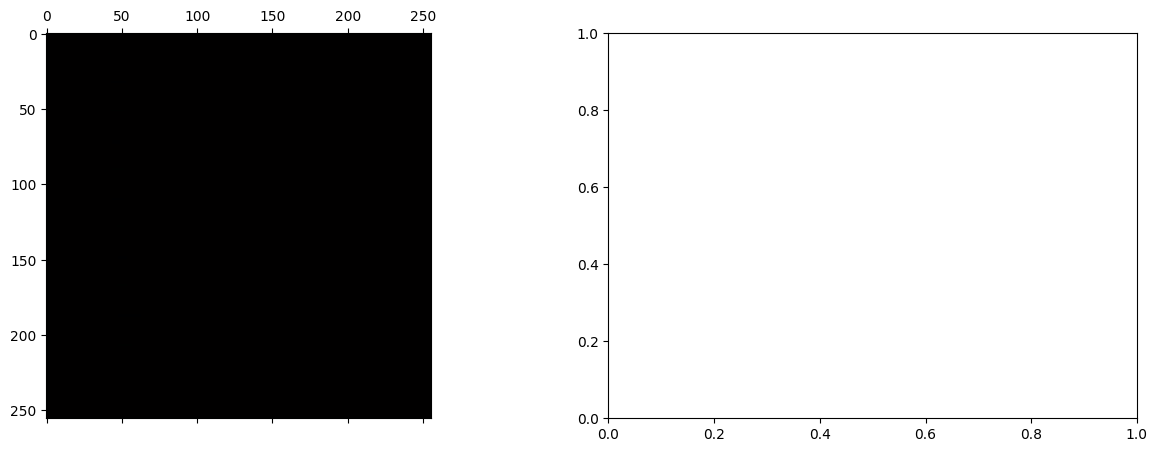

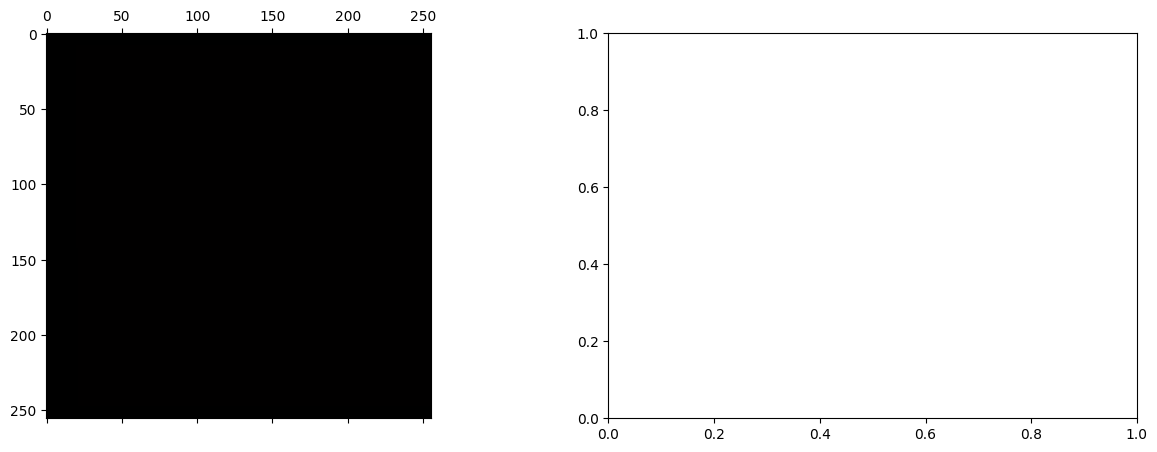

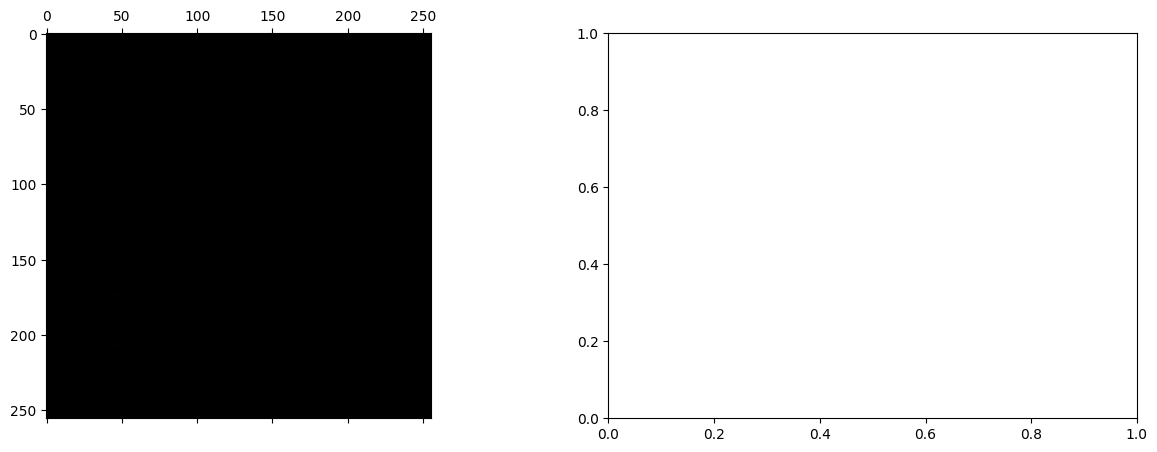

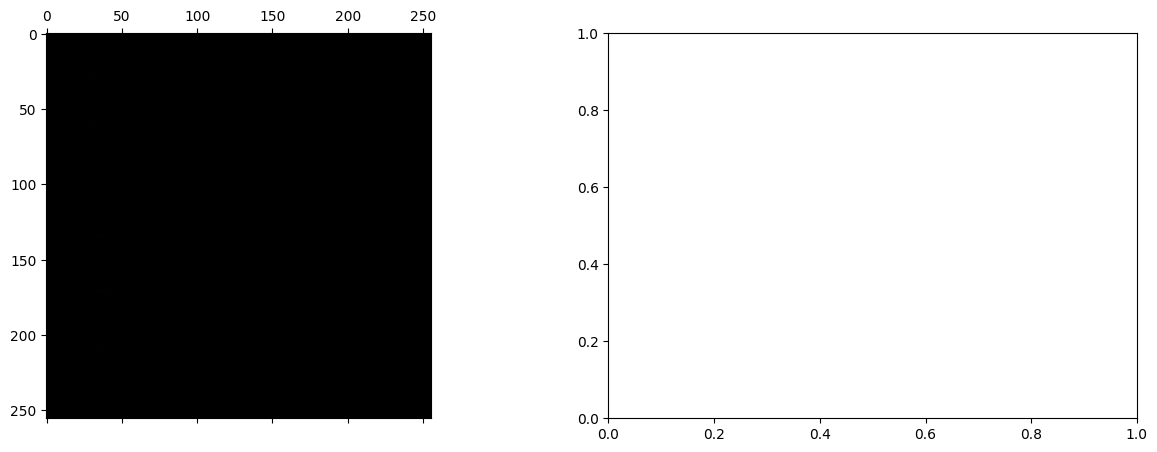

In [6]:
x_batch, y_batch = paragraphs_dataset.x_train[:4], paragraphs_dataset.y_train[:4]
x_batch_aug, y_batch_aug = line_detector_model.augment_batch(x_batch, y_batch)

for ind in range(x_batch_aug.shape[0]):
    fig = plt.figure(figsize = (15,5))
    ax1 = fig.add_subplot(121)
    ax1.matshow(x_batch_aug[ind], cmap='gray')
    ax2 = fig.add_subplot(122)
    ax1.matshow(y_batch_aug[ind], cmap='gray')